 ## Import Libraries

In [19]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import nltk
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [20]:
data = pd.read_csv('preprocessed_emotion_dataset.csv')
data.drop(['tweet'], axis=1,inplace=True)
c = CountVectorizer()
x = c.fit_transform(data['clean_tweet']).toarray()
y = data.iloc[:,-1]

## Word to Vector

In [59]:
# create list of tokens
sentences = []
for i in range(data.shape[0]):
  sentences.append(data.clean_tweet[i].split())


# create Word2Vec model
model = Word2Vec(sentences, min_count=1)


# convert sentence to vector using word2vec
data['clean_tweet_vector'] = data.clean_tweet.copy()
for i, sent in enumerate(sentences):
  data['clean_tweet_vector'][i] = np.mean(model[sent], axis=0)

data.head()

,clean_tweet,emotion,clean_tweet_vector
0,time ticking fast relive past happy joy face,happy,"[0.074514166, -0.31058, 0.09062411, -0.0577800..."
1,happy birthday one hot love much amazing frien...,happy,"[0.0952602, -0.3638543, 0.11053265, -0.0828822..."
2,best cheer left min cant save happy like treas...,happy,"[0.08808311, -0.3742489, 0.10711605, -0.068894..."
3,good morning wishing day filled sunshine happi...,happy,"[0.07637323, -0.32164025, 0.095309265, -0.0561..."
4,eric movie made happy several way think rely s...,happy,"[0.05260541, -0.22646743, 0.06517481, -0.04005..."


## split data intor train and test

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6172, 8014)
(1544, 8014)
(6172,)
(1544,)


# **Naive Bayes**

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_p1 = gnb.fit(x_train, y_train).predict(x_test)

In [79]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix


precision = precision_score(y_test, y_p1, average='weighted')
recall = recall_score(y_test, y_p1, average='weighted')
fscore = f1_score(y_test, y_p1, average='weighted')

print('Accuracy:', accuracy_score(y_test, y_p1))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

Accuracy: 0.5958549222797928
precision: 0.6095822417691428
recall: 0.5958549222797928
fscore: 0.5972450171800386


<AxesSubplot:>

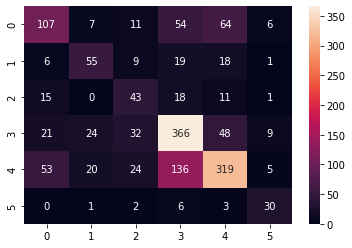

In [64]:
cm1 = confusion_matrix(y_p1, y_test)
sns.heatmap(cm1, annot=True, fmt='.0f')

# **Support Vector Machine**

In [65]:
from sklearn import svm

s = svm.SVC(kernel='linear')
s.fit(x_train, y_train)
y_p2 = s.predict(x_test)

In [78]:
print('Accuracy:', accuracy_score(y_test,y_p2))
precision = precision_score(y_test, y_p2, average='weighted')
recall = recall_score(y_test, y_p2, average='weighted')
fscore = f1_score(y_test, y_p2, average='weighted')

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

Accuracy: 0.8788860103626943
precision: 0.8791097952411145
recall: 0.8788860103626943
fscore: 0.87821139603388


<AxesSubplot:>

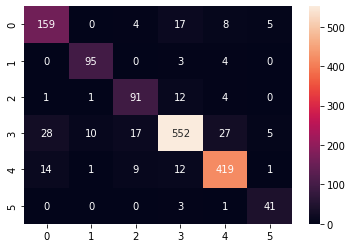

In [67]:
cm2 = confusion_matrix(y_p2,y_test)
sns.heatmap(cm2, annot=True, fmt='.0f')

# **Decision Tree**

In [68]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_p3 = clf.predict(x_test)

In [77]:

precision = precision_score(y_test, y_p3, average='weighted')
recall = recall_score(y_test, y_p3, average='weighted')
fscore = f1_score(y_test, y_p3, average='weighted')
print('Accuracy:', accuracy_score(y_test, y_p3))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

Accuracy: 0.8814766839378239
precision: 0.8830594771029311
recall: 0.8814766839378239
fscore: 0.8806872428799765


<AxesSubplot:>

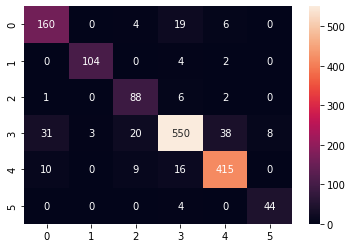

In [70]:
cm3 = confusion_matrix(y_p3, y_test)
sns.heatmap(cm3, annot=True, fmt='.0f')

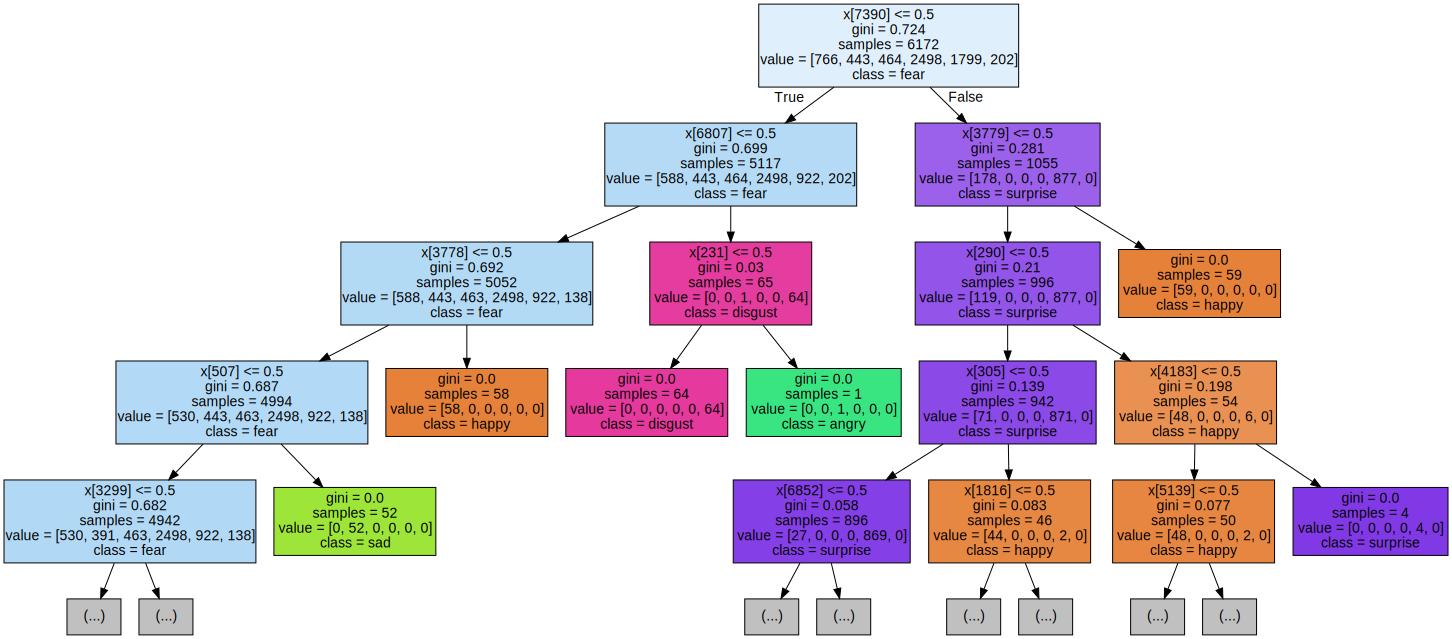

In [71]:
import graphviz
dot_data = tree.export_graphviz(clf, class_names=['happy','sad','angry','fear','surprise','disgust'] ,filled=True, max_depth=4)
graph = graphviz.Source(dot_data, format="png") 
graph

## **Neural Network Model**

In [80]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier((100, 60), activation='relu', learning_rate='adaptive')
model.fit(x_train, y_train)
y_p4 = model.predict(x_test)

In [81]:
precision = precision_score(y_test, y_p4, average='weighted')
recall = recall_score(y_test, y_p4, average='weighted')
fscore = f1_score(y_test, y_p4, average='weighted')
print('Accuracy:', accuracy_score(y_test, y_p4))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))

Accuracy: 0.8465025906735751
precision: 0.8493194770880256
recall: 0.8465025906735751
fscore: 0.8447916763554727


<AxesSubplot:>

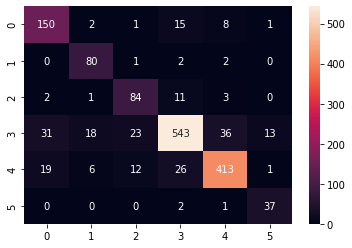

In [82]:
cm4 = confusion_matrix(y_p4, y_test)
sns.heatmap(cm4, annot=True, fmt='.0f')